# Report for 2D Project Physical World and Digital World

Cohort: 04

Team No.: 04
Members:
Edmund Chiang Jia Wei (1002699)
Ian Lim Li Ern (1002678)
Latasha Lenus (1003106)
Song Zhiguo (1002290)
Hong Pengfei (1002949)


# Introduction

Write your introduction here. Describe the problem you want to solve and a brief of your approach and summary of your result.

Problem:
To reduce the time taken for the thermosensor to reach thermoequilibrium with the water as much as possible while keeps the error within one second, We will use LinearRegression model provided by scikitlearn to create a predictive model.

approach:
we want to use the knowledge about the heat capacity and heat transfer we learned in Physical world build the mathmatical model to get the relationship between the time and the thermosensor. The equation we get by solving the mathmatical equation is Ln( (Tw-Ts) / (Tw-Tsi) ) = -time/tao. where Tw: the water temperature, Ts: sensor temperature, Tsi: initial sensor temperature( sensor temperature at t=0), tao=constant

the mathmatical equation suggest that the time and Ln( (Tw-Ts) / (Tw-Tsi) ) have linear relationship. We used actual data to verify the assumption by plotting out the first 30 seconds of the the data of different water temperature.(the code can be seen in data preparation).

We verified that the linear relationship between Ln( (Tw-Ts) / (Tw-Tsi) ) = -time/tao. (this is the important overall assumption for this whole report.) thus, after give the first n seconds of the model, we need to find the Tw that gives the most linear relationship. we used r2_score to determine the linearity. the higher value of the R2_score the better the linearity.

We also modify the Tw predicted by adding an extra term, this prove to be effective.

summary:
after doing all the things above. prove that adding the extra term is quite useful. we are able to control the error within one degree with only first 10 second of data.

# Description of Data from Experiment

## Data Collection

Describe how you collect your data and the reasoning behind such approach.

we used thermobottle to keep the temperature of the water constant. (the changing temperature of the water can cause error to our predicting model. Then we use the thermometer to measure the temperature of the water. we chose 46 sets of temperature of the water distributed evenly from 60 to 10 celsius by adding cold water inside the hot water. 

We make sure the start temperature of the thermosensor to be stablized at room temperature(fluactuated from 30 to 25 celsius). We put the thermosensor inside the water after the temperature of the thermosensor stablizes. and we minimized the time interval every detection for the thermometer. then we crop the first few seconds where the 

the thermosensor collects data 0.96s per time

The output file from the rpi is some txt files. we used the following code to transfer the txt file into excel.


### Data Preparation

Describe how you prepare your data. Include any codes you have here.

### Data Preparation
then we are able to get an excel file containing all the temp at different water temperature. we then cut off the data to only keep the first 30 seconds of the data.

then we are able to get the dataset as file 'temp_ver3_30.xls' in the folder.

In [1]:
# need to put it into the raw_data_in_txt forlder to run
def version2():
    path = os.getcwd() # get into the same folder as the current txt files
    dirs = os.listdir(path) # find the path of the folder
    res = pd.DataFrame(np.arange(0.98,400,0.962),columns=['time']) # the time passed from start measuring the data, the time interval is roughly 0.962 
    for file in dirs: # get the name of the file
        if file[-1] == 't': # if the file is a text file
            with open(file, 'r') as f: # open the file
                lines = f.readlines() 
                temp_data = [round(float(line.strip().split()[1]),3) for line in lines] # splist the line and fee
                temp_data = pd.DataFrame(temp_data,columns=[file[9:12]]) # get the columns for different water temperature, file[9:12] stands for different water temperature, we named it this way, please see the raw data folder
                res = pd.concat([res, temp_data], axis=1, join='outer') # append new data into the folder horizontally
    res.to_excel('temp_ver3_30.xls') # write the current data into a excel file called temp_ver3_30.xls

### Data preparation
test the linear relation between Ln( (Tw-Ts) / (Tw-Tsi) ) and time
we used the following code to plot the data, the linear relationshiop can be seen visually

/home/emrys/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


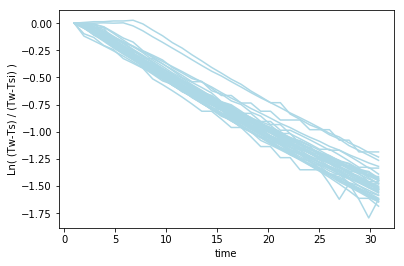

In [4]:
## and we visualize the log data we plotted
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def data_visualization_log():
    data = pd.read_excel('temp_ver3_30.xls') 
    for col in data.columns[1:]: # because the first column is time, so we dont need to include the first temperature

        data.ix[:,col] =  np.log( (np.float(col)/10 - np.array(data.ix[:,col]))/
                                 ((np.float(col)/10)-np.array(data.ix[0,col])) ) # this is  Ln( (Tw-Ts) / (Tw-Tsi) ). data.ix[0,col] means the first element in the col which is the initial temperature of the thermosensor
    time = data.ix[:, 'time']
    for col in data.columns[1:]:   # float(col)/10 is different water temperature
        temp = data.ix[:,col]       # we plot all the graphs of different temperatures to visualize the linear relationship between Ln( (Tw-Ts) / (Tw-Tsi) ) and time
        
        plt.plot(time,temp,color='lightblue')  # temp = Ln( (Tw-Ts) / (Tw-Tsi) )
    plt.xlabel('time')
    plt.ylabel('Ln( (Tw-Ts) / (Tw-Tsi) )')
    plt.show()

data_visualization_log()

by plotting the data also helps us to identify normal data. this is the visualization for Ln( (Tw-Ts) / (Tw-Tsi) ) vs time. the overall relationship is linear except some small fluctuations due to the collection error.

## Data Format

Describe your data and its features. Include any codes or visualization of data.

the first column in the 'temp_ver3_30.xls' file is the time. we unify the time to be 0.962 second per detection. the time ranges from 0.98 to 30 second. and there are 30 data sets

the second to the last column is the temperature of the sensor. the label of the column is 10*(Tfinal) which is the temperature we want to predict.

we have 39 dataset that is if distributed evenly from 10 to 60 degree(we measured 46 datasets but get rid of some abnormal datasets)

the following code can be visualize the data

/home/emrys/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


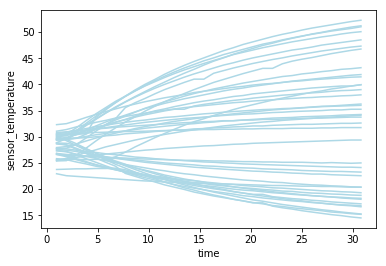

In [10]:
import matplotlib.pyplot as plt
def data_visualization():
    bunch_object = pd.read_excel('temp_ver3_30.xls')
    time = bunch_object.ix[:, 'time']
    for col in bunch_object.columns[1:]:

            temp = bunch_object.ix[:,col]
            plt.plot(time,temp,color='lightblue') # we can visualize the product by drawing sensor_temperature vs time
    plt.xlabel('time')
    plt.ylabel('sensor_temperature')
    plt.show()
data_visualization()

the plotting of the dataset make sense as the temperature of the sensor first rises from room temperature (ranges from 25 to 30 degree because we want to test the model works for different room temperature) and become gradually flatten and times goes on. finally it is equal to the water temperature.

# Training Model

Describe how you train your model. Include any code and output

the model did not need any training to work, because we build it by physical and mathmatical model, we did not choose to train the model with 11 or 12 features as we think it would probably over fit the model.

instead I choose to predict the temperature by utilizing the physical model we discussed previously that is: Ln( (Tw-Ts) / (Tw-Tsi) ) and time should have linear relationship.  where Tw: the water temperature, Ts: sensor temperature, Tsi: initial sensor temperature( sensor temperature at t=0), tao=co0nstant.
therefore we choose to prepare the dataset two features 1. time 2. Ln( (Tw-Ts) / (Tw-Tsi) ). due to the assumption the correct temperature water should give the line that is most linear.

we can get the predicted water temperature by trying which water temperature give us the most linear line that best fits the dataset we have.

first assume the temperature equals to the last temperature of the thermosensor and then we assume the linear relationship between Ln( (Tw-Ts) / (Tw-Tsi) ) and time. then we use LinearRegression model to find a trendline that best fits the corrected model of the points. then we gradullay increase/decrease the temperature by 0.1 degree to see whether it can fit into better linearity of the model

for example if we have out dataset like this:
1s:26dgree 2s:27degree 3s:28degree .................30s:45degree. T
the target temperature we want to predict is 50 degree

then we start to assume the water temperature is 45 degree, and then we find the linear relationship between Ln( (45-Ts) / (45-26) ) and time, after that we see the R2 score of assuming water temperature is 45 degree. and then we assume the water temperature is 45.1 degree. and we find the r2 score of the water temperature 45.1 degree. the r2_score should be higher because the linear relationship becomes bigger between Ln( (45-Ts) / (45-26) ) vs time than Ln( (45-Ts) / (45-26) ) and time.

therefore we can just add on the value of water 0.1 step by step until it reaches the same as the temperature of the water. then the r2_score should begin to decrease and then we stop at that temperature. so the predicted temperature in the example should be 45 degree.

In [10]:
# the code is here
# please see the annotation at last code of the trainning data
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
class Predict:
    def linear_regression(self,bunch_object):
        

        time = bunch_object.ix[:, 0]

        temp = np.array(bunch_object.ix[:, 1])
        if temp[-1] > temp[0]:
            delta = 0.1
            tw = temp[-1]+0.1
        elif temp[-1] < temp[0]:
            delta = -0.1
            tw = temp[-1]-0.1

        R_2 = 0
        while True:

            x = time
            x = x.reshape(-1,1)

            y = np.log( (tw-np.array(bunch_object.ix[:,1])) / (tw-bunch_object.ix[0,1]) )

            #x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=seed)

            regr = linear_model.LinearRegression()

            regr.fit(x, y)

            y_pred = regr.predict(x)
            New_R_2 = r2_score(y, y_pred)
            if New_R_2 > R_2:
                R_2 = New_R_2
                tw = tw + delta

            else:
                break

        return tw






# Verification and Accuracy

Describe how you check the accuracy of your model and its result. State any analysis you have and the steps you have taken to improve its accuracy.

since our model did not use any training data. we can use all the dataset we have to test the model. we test the model against 39 dataset and output the error against temperature.

In [6]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def test_accuracy():
    bunch_object = pd.read_excel('temp_ver3_30.xls')
    bunch_object = bunch_object.dropna(how='all')
    
    time = bunch_object.ix[:, 0]
    error_list = []
    for col in bunch_object.columns[1:]:

        temp = np.array(bunch_object.ix[:, col]) 
        if temp[-1] > temp[0]:
            delta = 0.1
            tw = temp[-1]+0.1
        elif temp[-1] < temp[0]:
            delta = -0.1
            tw = temp[-1]-0.1

        R_2 = 0
        while True:

            
            x = time.reshape(-1,1)

            y = np.log( (tw-np.array(bunch_object.ix[:,col])) / (tw-bunch_object.ix[0,col]) )

            regr = linear_model.LinearRegression()

            regr.fit(x, y)

            y_pred = regr.predict(x)
            New_R_2 = r2_score(y, y_pred)
            if New_R_2 > R_2:
                R_2 = New_R_2
                tw = tw + delta

            else:
                break
            if tw>60:
                break
        error = float(col)/10-tw
        error_list.append(error,tw) # we define error as Tacutal - Tpredicted
    return error_list

print(test_accuracy())

/home/emrys/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
/home/emrys/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


[(0.3499999999999872, 34.45000000000001), (0.9499999999999744, 37.85000000000002), (0.7629999999999768, 43.23700000000002), (1.5879999999999583, 50.41200000000004), (0.5999999999999872, 37.100000000000016), (1.049999999999926, 52.050000000000075), (-1.100000000000012, 11.100000000000012), (0.5749999999999815, 35.62500000000002), (-1.2500000000000107, 12.050000000000011), (1.5999999999999517, 52.10000000000005), (-1.1870000000000065, 13.087000000000007), (-0.761999999999972, 16.061999999999973), (-0.17499999999999005, 19.77499999999999), (-0.6119999999999806, 17.41199999999998), (1.024999999999963, 44.375000000000036), (-0.7249999999999996, 13.924999999999999), (0.8129999999999598, 46.18700000000004), (1.449999999999939, 56.45000000000006), (2.4130000000000003, 12.187), (-1.611999999999993, 15.111999999999993), (-0.8499999999999783, 16.74999999999998), (0.7999999999999758, 40.800000000000026), (0.2249999999999872, 30.275000000000013), (-0.12499999999998934, 23.42499999999999), (0.074999

## improve the accuracy
we find out that the error increases as the temperature of the water increases
therefore, we let error = Ta-Tp where Ta is the actual temperature of the thermeter and Tp is temperature predicted. we use the folloing code

/home/emrys/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
/home/emrys/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


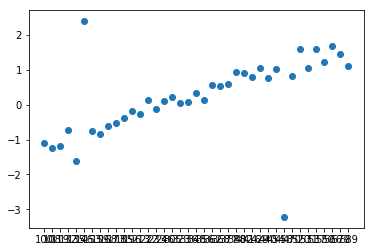

In [7]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# all the annotation is at the last
def visualize_error():
    bunch_object = pd.read_excel('temp_ver3_30.xls')
    bunch_object = bunch_object.dropna(how='all')
    
    time = bunch_object.ix[:, 0]
    error_list = []
    for col in bunch_object.columns[1:]:

        temp = np.array(bunch_object.ix[:, col]) 
        if temp[-1] > temp[0]:
            delta = 0.1
            tw = temp[-1]+0.1
        elif temp[-1] < temp[0]:
            delta = -0.1
            tw = temp[-1]-0.1

        R_2 = 0
        while True:

            
            x = time.reshape(-1,1)

            y = np.log( (tw-np.array(bunch_object.ix[:,col])) / (tw-bunch_object.ix[0,col]) )

            regr = linear_model.LinearRegression()

            regr.fit(x, y)

            y_pred = regr.predict(x)
            New_R_2 = r2_score(y, y_pred)
            if New_R_2 > R_2:
                R_2 = New_R_2
                tw = tw + delta

            else:
                break
            if tw>60:
                break
        
        error_list.append(float(col)/10-tw)
    plt.scatter(bunch_object.columns[1:],error_list)
    plt.xlabel('predicted_water_temperature')
    plt.show('error')
visualize_error()

we can see the linear relationship between the error and the predicted temperature, therefore we write a code to find the relationship using LinearRegression from Sckitlearn

In [10]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# all the annotation is at the last
def error():
    bunch_object = pd.read_excel('temp_ver3_30.xls')
    bunch_object = bunch_object.dropna(how='all')
    
    time = bunch_object.ix[:, 0]
    error_list = []
    for col in bunch_object.columns[1:]:

        temp = np.array(bunch_object.ix[:, col]) 
        if temp[-1] > temp[0]:
            delta = 0.1
            tw = temp[-1]+0.1
        elif temp[-1] < temp[0]:
            delta = -0.1
            tw = temp[-1]-0.1

        R_2 = 0
        while True:

            
            x = time.reshape(-1,1)

            y = np.log( (tw-np.array(bunch_object.ix[:,col])) / (tw-bunch_object.ix[0,col]) ) 

            regr = linear_model.LinearRegression()

            regr.fit(x, y)

            y_pred = regr.predict(x)
            New_R_2 = r2_score(y, y_pred)
            if New_R_2 > R_2:
                R_2 = New_R_2
                tw = tw + delta

            else:
                break
            if tw>60:
                break
        
        error_list.append(float(col)/10-tw)
    regr_error = linear_model.LinearRegression()
    regr_error.fit(x, y)
    return regr_error.coef_, regr_error.intercept_ # get the coefficient and the intercept between the error and predicted temperature
error()

/home/emrys/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
/home/emrys/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


(array([-0.05611299]), 0.06697136676144277)


therefore the error = -0.056Tp + 0.067 however after get rid of the two points that is abnormal on the dataset we are able to get the following equation:
error = -0.054*Tp + 1.65
since Ta - Tp = error, so Ta = Tp + error, so Ta = 1.054-1.65
so the corrected version for the class is:

In [1]:
# the code is here
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
class Predict:
    def __init__(self):
        pass
    def predict(self,bunch_object):
        

        time = bunch_object.ix[:, 0]

        temp = np.array(bunch_object.ix[:, 1])
        if temp[-1] > temp[0]: # this is to check whether the last value of the temperature is bigger than the initial temperature of the sensor
            delta = 0.1        # if it is, it means that the temperature value of the water is increasing and we need to find a positive step
            tw = temp[-1]+0.1  # this is to assume the temperature value to be the initial value of the temperature and to try out
        elif temp[-1] < temp[0]: # if the temperature of the sensor started to decrease
            delta = -0.1           #  we choose a step that is negative 
            tw = temp[-1]-0.1     # and assume the temperature of the water to be the last value of the sensor

        R_2 = 0 # we start from R_2 = 0 which is the smallest number possible and means there is no linear relationship between Ln( (Tw-Ts) / (Tw-Tsi) )
        while True: # while the next Tw gives a better linear relationship

            x = time
            x = x.reshape(-1,1)

            y = np.log( (tw-np.array(bunch_object.ix[:,1])) / (tw-bunch_object.ix[0,1]) ) # y = Ln( (Tw-Ts) / (Tw-Tsi) )

            
            regr = linear_model.LinearRegression()

            regr.fit(x, y)

            y_pred = regr.predict(x)
            
            New_R_2 = r2_score(y, y_pred) # see if r2_score is bigger than the normal r2_score
            
            if New_R_2 > R_2:
                R_2 = New_R_2
                tw = tw + delta # if it is means the next Tw value means a more linear model so we can continue updating

            else:
                break           # but if the r2_score begin to drop means that we need to stop updating the score

        return 1.054*tw-1.65




import pickle
prediction = Predict()
pickle.dump( prediction, open( "save.p", "wb" ) )



# Testing Using Instructor's Data

Instruction:

* Store your trained model into a pickle object which can be loaded. 
* Read an excel file with the following format:
```
time (s)	reading
0.00	    25.812
0.90	    28.562
1.79	    31.875
2.68	    35.062
3.55	    37.937
4.43	    40.687
5.30	    43.25
```
where the first column indicates the time in seconds and the second column indicates the sensor reading in Celsius. 
* The number of rows in the instructors' data can be of any number. If your code has a minimum number of rows, your code must be able to handle and exit safely when the data provided is less than the required minimum.
* Write a code to prepare the data for prediction.
* Write a code to predict the final temperature.



In [2]:
# write a code to load your trained model from a pickle object
import pickle
filename = 'save.p' # enter your pickle file name containing the model
with open(filename,'rb') as f:
    model = pickle.load(f)


In [3]:
# write a code to read an excel file
import pandas as pd
num_test = 9
filename = 'temp_' 
filekey = [] # instructors will key in this
dataframe = {} # this is to store the data for different temperature, the keys are in filekey
for idx in range(9):
    dataframe[filekey[idx]] = pd.read_excel(filename+filekey[idx]+'.xlsx')


{'82':     time (s)  reading
0       0.00   26.000
1       0.87   28.687
2       1.74   31.437
3       2.62   34.125
4       3.49   36.562
5       4.36   38.875
6       5.23   41.000
7       6.10   43.000
8       6.97   44.875
9       7.84   46.625
10      8.71   48.250
11      9.58   49.812
12     10.45   51.250
13     11.32   52.625
14     12.19   53.937
15     13.06   55.187
16     13.93   56.312
17     14.80   57.437
18     15.67   58.500}


In [6]:
# write a code to prepare the data for predicting
def preprocess(df):
    # use this function to extract the features from the data frame
    pass

data_test = {}
for key in filekey:
    data_test[key]=dataframe[key]


In [7]:
# write a code to predict the final temperature
# store the predicted temperature in a variable called "predicted"
# predicted is a dictionary where the keys are listed in filekey

predicted = {}
for key in filekey:
    print(data_test[key])
    predicted[key]=model.predict(data_test[key])

    time (s)  reading
0       0.00   26.000
1       0.87   28.687
2       1.74   31.437
3       2.62   34.125
4       3.49   36.562
5       4.36   38.875
6       5.23   41.000
7       6.10   43.000
8       6.97   44.875
9       7.84   46.625
10      8.71   48.250
11      9.58   49.812
12     10.45   51.250
13     11.32   52.625
14     12.19   53.937
15     13.06   55.187
16     13.93   56.312
17     14.80   57.437
18     15.67   58.500


/home/emrys/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/emrys/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [9]:
# checking accuracy
# first instructor will load the actual temp from a pickle object
import pickle
error_d = {}
accuracy_percent_d = {}

for test in range(num_test):
    filename = 'data_'+filekey[test]+'.pickle'
    with open(filename,'rb') as f:
        final_temp, worst_temp = pickle.load(f)

    # then calculate the error
    error_final = abs(final_temp-predicted[filekey[test]])
    accuracy_final_percent = 100-error_final/final_temp*100
    error_worst = abs(worst_temp-predicted[filekey[test]])
    accuracy_worst_percent = 100-error_worst/worst_temp*100
    
    error_d[filekey[test]] = (error_final, error_worst)
    accuracy_percent_d[filekey[test]] = (accuracy_final_percent, accuracy_worst_percent)

    # displaying the error
    print('===================================')
    print('Testing: {}'.format(filekey[test]))
    print('Predicted Temp: {:.2f}'.format(predicted[filekey[test]]))
    print('Final Sensor Temp: {:.2f}, Alcohol Temp:{:.2f}'.format(final_temp, worst_temp))
    print('Error w.r.t Final Sensor Temp: {:.2f} deg, {:.2f}% accuracy'.format(error_final, accuracy_final_percent))
    print('Error w.r.t Alcohol Temp: {:.2f} deg, {:.2f}% accuracy'.format(error_worst, accuracy_worst_percent))
    
avg_final = sum([ final for final, worst in accuracy_percent_d.values()])/len(error_d.values())
avg_worst = sum([ worst for final, worst in accuracy_percent_d.values()])/len(error_d.values())
print('==============================')
print('Average accuracy for final sensor temp: {:.2f}'.format(avg_final))
print('AVerage accuracy for alcohol temp: {:.2f}'.format(avg_worst))


{'82': 76.97839999999944}


FileNotFoundError: [Errno 2] No such file or directory: 'data_82.pickle'